In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv("british-airways-reviews.csv")
df.head()

,Review
0,Not Verified| We are flying Business class fo...
1,✅Trip Verified| I am in Australia and on Frid...
2,✅Trip Verified| At 7.54 am on the day of trav...
3,✅Trip Verified| Would happily fly them again....
4,"Not Verified| Flew premium, only worth the ex..."


In [3]:
# remove "Trip Verified" and "Trip not verified" from the "review" column using regex
df['Review'] = df['Review'].str.replace(r'Trip (not )?Verified\| ', '', regex=True)

In [4]:
df.head()

,Review
0,Not Verified| We are flying Business class fo...
1,"✅ I am in Australia and on Friday night, went ..."
2,✅ At 7.54 am on the day of travel whilst drivi...
3,✅ Would happily fly them again. I had a person...
4,"Not Verified| Flew premium, only worth the ex..."


In [5]:
df["Review"]

0       Not Verified|  We are flying Business class fo...
1       ✅ I am in Australia and on Friday night, went ...
2       ✅ At 7.54 am on the day of travel whilst drivi...
3       ✅ Would happily fly them again. I had a person...
4       Not Verified|  Flew premium, only worth the ex...
                              ...                        
3482    Flew LHR - VIE return operated by bmi but BA a...
3483    LHR to HAM. Purser addresses all club passenge...
3484    My son who had worked for British Airways urge...
3485    London City-New York JFK via Shannon on A318 b...
3486    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: Review, Length: 3487, dtype: object

In [6]:
df.shape

(3487, 1)

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
analyzer = SentimentIntensityAnalyzer()

# Calculate the sentiment scores for each row in the 'Review' column
scores = df['Review'].apply(analyzer.polarity_scores)

# Combine the scores into a DataFrame
scores_df = pd.DataFrame(list(scores))

# Concatenate the scores DataFrame with the original DataFrame
result_df = pd.concat([df, scores_df], axis=1)


In [10]:
print(result_df)

                                                 Review    neg    neu    pos  \
0     Not Verified|  We are flying Business class fo...  0.034  0.943  0.023   
1     ✅ I am in Australia and on Friday night, went ...  0.060  0.932  0.008   
2     ✅ At 7.54 am on the day of travel whilst drivi...  0.146  0.754  0.100   
3     ✅ Would happily fly them again. I had a person...  0.051  0.686  0.263   
4     Not Verified|  Flew premium, only worth the ex...  0.103  0.777  0.120   
...                                                 ...    ...    ...    ...   
3482  Flew LHR - VIE return operated by bmi but BA a...  0.027  0.667  0.306   
3483  LHR to HAM. Purser addresses all club passenge...  0.000  0.712  0.288   
3484  My son who had worked for British Airways urge...  0.056  0.875  0.069   
3485  London City-New York JFK via Shannon on A318 b...  0.000  0.711  0.289   
3486  SIN-LHR BA12 B747-436 First Class. Old aircraf...  0.078  0.795  0.126   

      compound  
0      -0.4932  
1    

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


# Calculate the sentiment scores for each row in the 'Review' column
scores = df['Review'].apply(analyzer.polarity_scores)

# Combine the scores into a DataFrame
scores_df = pd.DataFrame(list(scores))

# Add a new column to the original DataFrame with the sentiment labels
conditions = [
    (scores_df['compound'] > 0.05),
    (scores_df['compound'] < -0.05),
    (scores_df['compound'] >= -0.05) & (scores_df['compound'] <= 0.05)
]

values = ['positive', 'negative', 'neutral']

df['sentiment'] = np.select(conditions, values)

# Concatenate the scores DataFrame with the original DataFrame
result_df = pd.concat([df, scores_df], axis=1)

# Print the resulting DataFrame with the sentiment scores and labels
print(result_df)

                                                 Review sentiment    neg  \
0     Not Verified|  We are flying Business class fo...  negative  0.034   
1     ✅ I am in Australia and on Friday night, went ...  negative  0.060   
2     ✅ At 7.54 am on the day of travel whilst drivi...  negative  0.146   
3     ✅ Would happily fly them again. I had a person...  positive  0.051   
4     Not Verified|  Flew premium, only worth the ex...  positive  0.103   
...                                                 ...       ...    ...   
3482  Flew LHR - VIE return operated by bmi but BA a...  positive  0.027   
3483  LHR to HAM. Purser addresses all club passenge...  positive  0.000   
3484  My son who had worked for British Airways urge...  positive  0.056   
3485  London City-New York JFK via Shannon on A318 b...  positive  0.000   
3486  SIN-LHR BA12 B747-436 First Class. Old aircraf...  positive  0.078   

        neu    pos  compound  
0     0.943  0.023   -0.4932  
1     0.932  0.008   -0.7

In [12]:
result_df = pd.read_csv("result.csv")

In [14]:
import nltk
import re

# Download the stopwords and punkt tokenizer from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to clean the text
def clean_text(text):
    # Remove any URLs
    text = re.sub(r'http\S+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Apply the clean_text function to the 'Review' column and save the results to the 'clean_review' column
result_df['clean_review'] = result_df['Review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


### Plotting Histograph And wordcloud 

The histogram and wordcloud below is a graphical representation of the sentiment scores visual representation of the most common words in the reviews present in the DataFrame respectively. For the histogram The x-axis represents the sentiment scores ranging from negative to positive, while the y-axis represents the frequency or the number of times a particular sentiment score occurs in the dataset.

The histogram can help to provide an overall understanding of the sentiment polarity present in the dataset. If the histogram is skewed towards positive sentiment scores, it means that the majority of the reviews have positive sentiment. Similarly, if the histogram is skewed towards negative sentiment scores, it means that the majority of the reviews have negative sentiment.

By looking at the histogram, One can quickly understand the overall sentiment polarity of the reviews and make data-driven decisions accordingly. The word cloud is a visual representation of the most commonly occurring words in the reviews present in the dataset. The size of each word in the cloud represents its frequency of occurrence, with larger words indicating more frequent occurrence.

The word cloud can help to provide a quick overview of the most common themes and topics discussed in the reviews, which can help stakeholders to understand the strengths and weaknesses of the product or service being reviewed.

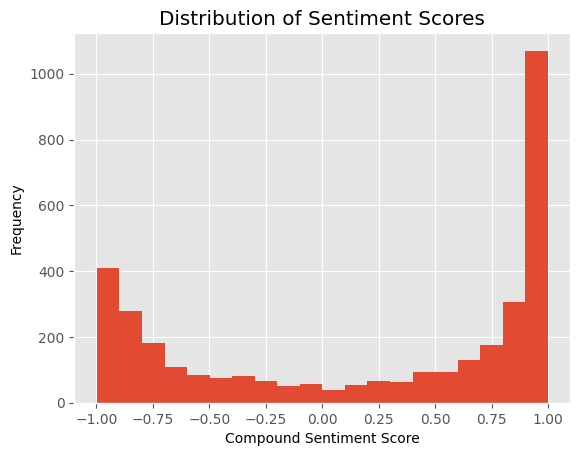

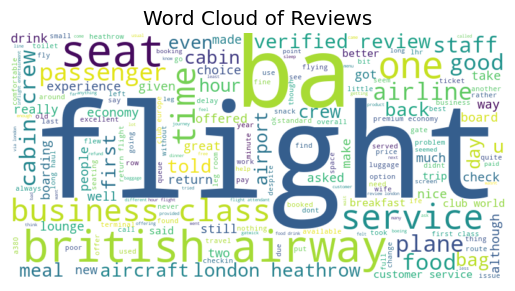

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Plot a histogram of the compound scores
plt.hist(result_df['compound'], bins=20)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()
plt.savefig('Compound Sentiment Score.png')
# Generate a word cloud of the most common words in the reviews
text = ' '.join(result_df['clean_review'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [17]:
pip install vaderSentiment


     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --------- --------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
     --------------------------- --------- 92.2/126.0 kB 751.6 kB/s eta 0:00:01
     -------------------------------------  122.9/126.0 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 672.7 kB/s eta 0:00:00


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment category for a given score
def get_sentiment_category(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analyzer to each review and store the compound score in a new column
result_df['compound_score'] = result_df['clean_review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])

# Apply the get_sentiment_category function to each compound score and store the result in a new column
result_df['sentiment'] = result_df['compound_score'].apply(get_sentiment_category)


This visual of a bar graph helps us to understand the overall sentiment of the reviews - are they mostly positive, negative or neutral? By seeing the number of reviews in each category, we can get an idea of how customers feel about the product or service being reviewed. This information can be useful for businesses to improve their products or services based on customer feedback.

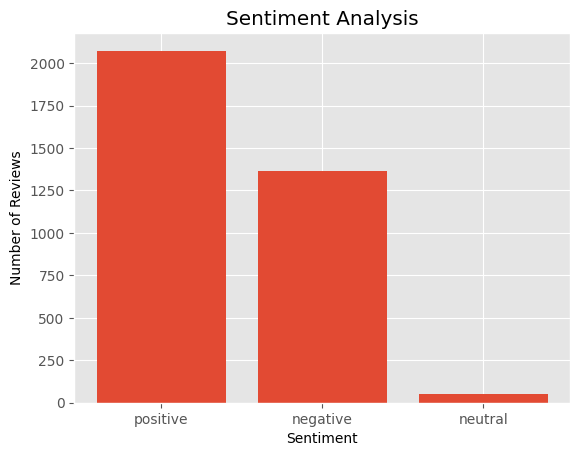

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# Group the data by sentiment category and count the number of reviews in each category
sentiment_counts = df['sentiment'].value_counts()

# Create a bar chart of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


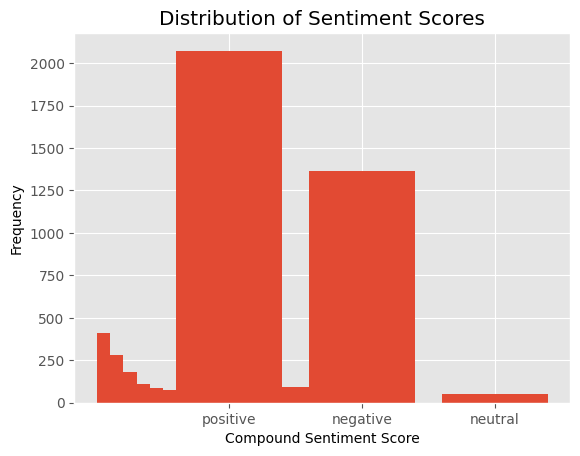

In [21]:
import matplotlib.pyplot as plt

# create a bar chart of sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.savefig('sentiment_counts.png', dpi=300, bbox_inches='tight')

# Generate a histogram of the compound scores
plt.hist(result_df['compound'], bins=20)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.savefig('histogram.png')

# Generate a word cloud of the most common words in the reviews
text = ' '.join(result_df['clean_review'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
wordcloud.to_file('wordcloud.png')